In [2]:
# SINGLE SOLUTION: FAST PACKAGE INSTALL & LOAD FOR GOOGLE COLAB R
# ============================================================================
# This optimized code checks for pre-installed packages, uses a fast mirror,
# installs only missing ones in parallel with limited deps, and loads them.
# Expected time: 2-5 minutes (vs. 10-20+ originally).
# For persistence across sessions: See notes at bottom.

cat("Optimizing package installation...\n")

# Step 0: Set fast CRAN mirror and custom lib for speed
options(repos = c(CRAN = "https://cloud.r-project.org/"))
dir.create("my_R_lib", showWarnings = FALSE)
.libPaths(c("my_R_lib", .libPaths()))

# Step 1: Your required packages (tidyverse covers readr, dplyr, ggplot2)
packages <- c(
  "tidyverse",      # Core: dplyr, ggplot2, readr, etc.
  "gridExtra",      # Plot arranging
  "corrplot",       # Correlations
  "arules", "arulesViz",  # Rules mining
  "caret",          # ML toolkit
  "randomForest",   # RF model
  "e1071",          # SVM
  "scales",         # Viz scales
  "RColorBrewer",   # Colors
  "reshape2",       # Reshaping
  "lubridate",      # Dates
  "knitr",          # Reports
  "naniar"          # Missing data
)

# Step 2: Check what's already installed (Colab may have some)
installed <- installed.packages()[, "Package"]
missing_packages <- packages[!packages %in% installed]
cat("Missing packages to install:", length(missing_packages), "\n")
if (length(missing_packages) == 0) {
  cat("All packages already installed!\n")
} else {
  # Install only missing ones: Parallel, binary-first, limited deps
  install.packages(missing_packages,
                   dependencies = c("Depends", "Imports"),  # Skip Suggests for speed
                   Ncpus = 2)  # Parallel on Colab's cores
}

# Step 3: Load all (even if pre-installed)
invisible(lapply(packages, library, character.only = TRUE, quietly = TRUE))
cat("All packages loaded successfully!\n\n")

# ============================================================================
# OPTIONAL: PERSISTENCE FOR FUTURE SESSIONS (One-time setup, then ~10s restore)
# Run this AFTER successful install above (in same notebook).
# 1. Tar your custom lib:
system("tar -czf my_R_lib.tar.gz -C . my_R_lib")
# 2. Upload to Drive: Files panel > right-click my_R_lib.tar.gz > Move to Drive.
# 3. In FUTURE notebooks, add this at start (replace FILE_ID):
#    if (!require(googledrive)) install.packages("googledrive"); library(googledrive)
#    drive_auth()  # Auth prompt
#    drive_download(as_id("YOUR_FILE_ID_HERE"), path = "my_R_lib.tar.gz", overwrite = TRUE)
#    untar("my_R_lib.tar.gz", exdir = "my_R_lib")
#    .libPaths(c("my_R_lib", .libPaths()))
#    lapply(packages, library, character.only = TRUE)
# ============================================================================

Optimizing package installation...
Missing packages to install: 2 


Installing packages into ‘/content/my_R_lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘ipred’, ‘recipes’, ‘norm’, ‘visdat’, ‘UpSetR’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.95 loaded


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked fro

All packages loaded successfully!



In [4]:
# ============================================================================
# STEP 2: LOAD THE DATA
# ============================================================================
cat("Loading data...\n")

# Load the CSV file (upload your CSV to Google Colab first)
# For Google Colab: Upload file using the folder icon on left sidebar
df <- read.csv("final_200_responses_ranges_corrected.csv",
               stringsAsFactors = FALSE,
               encoding = "UTF-8")

cat("Data loaded successfully!\n")
cat("Dataset dimensions:", nrow(df), "rows and", ncol(df), "columns\n\n")

# Display first few rows
cat("First few rows of the dataset:\n")
head(df, 3)


Loading data...
Data loaded successfully!
Dataset dimensions: 200 rows and 13 columns

First few rows of the dataset:


,Timestamp,Roll.no.,Gender,Which.e.commerce.platform.do.you.use.most.,Which.category.do.you.purchase.most.online.,X..When.shopping.online..what.do.you.prioritize...,How.often.do.you.shop.online.,Do.friends.or.peers.influence.your.online.purchases.,Have.you.returned.or.exchanged.products.online.,How.much.do.you.spend.on.e.commerce.monthly.,How.important.are.discounts.when.shopping.online.,Payment.Method,How.helpful.are.product.recommendations.while.shopping.online.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2025/08/31 12:29:07 am GMT+5:30,102315148,Female,Amazon,Fashion,Balanced (both brand and cost),Only during festive periods,Sometimes,"Yes, due to size/fit issue","₹0–₹1,000",High importance,UPI,Somewhat helpful
2,2025/08/31 9:42:19 am GMT+5:30,6264,Female,Amazon,Fashion,Balanced (both brand and cost),Monthly,Sometimes,"Yes, due to size/fit issue","₹0–₹1,000",High importance,UPI,Somewhat helpful
3,2025/08/31 9:43:01 am GMT+5:30,,Female,Myntra,Fashion,Depends on product category,Rarely,Rarely,"Yes, due to size/fit issue","₹0–₹1,000",High importance,UPI,Very helpful


In [5]:
# ============================================================================
# STEP 3: DATA EXPLORATION
# ============================================================================
cat("\n========== DATA EXPLORATION ==========\n")

# Structure of the dataset
cat("\nDataset Structure:\n")
str(df)

# Summary statistics
cat("\nSummary Statistics:\n")
summary(df)

# Check column names
cat("\nColumn Names:\n")
colnames(df)



========== DATA EXPLORATION ==========

Dataset Structure:
'data.frame':	200 obs. of  13 variables:
 $ Timestamp                                                     : chr  "2025/08/31 12:29:07 am GMT+5:30" "2025/08/31 9:42:19 am GMT+5:30" "2025/08/31 9:43:01 am GMT+5:30" "2025/08/31 9:44:40 am GMT+5:30" ...
 $ Roll.no.                                                      : chr  "102315148" "6264" "" "" ...
 $ Gender                                                        : chr  "Female" "Female" "Female" "Female" ...
 $ Which.e.commerce.platform.do.you.use.most.                    : chr  "Amazon" "Amazon" "Myntra" "Amazon" ...
 $ Which.category.do.you.purchase.most.online.                   : chr  "Fashion" "Fashion" "Fashion" "Fashion" ...
 $ X..When.shopping.online..what.do.you.prioritize...            : chr  "Balanced (both brand and cost)" "Balanced (both brand and cost)" "Depends on product category" "Balanced (both brand and cost)" ...
 $ How.often.do.you.shop.online.            

  Timestamp           Roll.no.            Gender         
 Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
 Which.e.commerce.platform.do.you.use.most.
 Length:200                                
 Class :character                          
 Mode  :character                          
 Which.category.do.you.purchase.most.online.
 Length:200                                 
 Class :character                           
 Mode  :character                           
 X..When.shopping.online..what.do.you.prioritize...
 Length:200                                        
 Class :character                                  
 Mode  :character                                  
 How.often.do.you.shop.online.
 Length:200                   
 Class :character             
 Mode  :character             
 Do.friends.or.peers.influence.your.online.purchases.
 Length:200               


Column Names:


[1] "Timestamp"                                                     
 [2] "Roll.no."                                                      
 [3] "Gender"                                                        
 [4] "Which.e.commerce.platform.do.you.use.most."                    
 [5] "Which.category.do.you.purchase.most.online."                   
 [6] "X..When.shopping.online..what.do.you.prioritize..."            
 [7] "How.often.do.you.shop.online."                                 
 [8] "Do.friends.or.peers.influence.your.online.purchases."          
 [9] "Have.you.returned.or.exchanged.products.online."               
[10] "How.much.do.you.spend.on.e.commerce.monthly."                  
[11] "How.important.are.discounts.when.shopping.online."             
[12] "Payment.Method"                                                
[13] "How.helpful.are.product.recommendations.while.shopping.online."

In [12]:
# ============================================================================
# STEP 4: DATA PREPROCESSING AND CLEANING
# ============================================================================
cat("\n========== DATA PREPROCESSING AND CLEANING ==========\n")

# Create a copy for cleaning
df_clean <- df

# 4.1: Clean column names (remove extra spaces and special characters)
cat("\n4.1: Cleaning column names...\n")
colnames(df_clean) <- gsub("^\\s+|\\s+$", "", colnames(df_clean))
colnames(df_clean) <- gsub("\\s+", "_", colnames(df_clean))
colnames(df_clean) <- gsub("[^A-Za-z0-9_]", "", colnames(df_clean))

# Rename columns for easier handling
colnames(df_clean) <- c(
  "Timestamp", "Roll_No", "Gender", "Platform", "Category",
  "Priority", "Frequency", "Peer_Influence", "Returns",
  "Monthly_Spend", "Discount_Importance", "Payment_Method",
  "Recommendation_Helpfulness"
)

cat("Column names cleaned successfully!\n")

# 4.2: Handle timestamp
cat("\n4.2: Processing timestamps...\n")
df_clean$Timestamp <- gsub(" GMT\\+5:30", "", df_clean$Timestamp)

# Try multiple date formats
df_clean$Timestamp_Clean <- as.POSIXct(NA)
for (i in 1:nrow(df_clean)) {
  ts <- df_clean$Timestamp[i]

  # Try format 1: "2025/08/31 12:29:07 am"
  parsed <- suppressWarnings(
    parse_date_time(ts, orders = c("Ymd IMSp", "dmY HM", "dmY HMS"), quiet = TRUE)
  )

  if (!is.na(parsed)) {
    df_clean$Timestamp_Clean[i] <- as.character(parsed)
  }
}

df_clean$Timestamp_Clean <- as.POSIXct(df_clean$Timestamp_Clean)

# 4.3: Handle missing values
cat("\n4.3: Handling missing values...\n")
cat("Missing values before cleaning:\n")
print(colSums(is.na(df_clean)))

# Replace empty strings with NA, but only in character columns
char_cols <- sapply(df_clean, is.character)
df_clean[char_cols][df_clean[char_cols] == ""] <- NA

# For Roll_No: Keep as is (some students may not want to share)
# For Gender: Impute with mode or mark as "Not Specified"
df_clean$Gender[is.na(df_clean$Gender) | df_clean$Gender == ""] <- "Not Specified"

# For other categorical variables, replace NA with
# "Not Specified" or the mode
categorical_cols <- c("Platform", "Category", "Priority", "Frequency",
                      "Peer_Influence", "Returns", "Discount_Importance",
                      "Payment_Method", "Recommendation_Helpfulness")

for (col in categorical_cols) {
  if (any(is.na(df_clean[[col]]))) {
    mode_val <- names(sort(table(df_clean[[col]]), decreasing = TRUE))[1]
    df_clean[[col]][is.na(df_clean[[col]])] <- mode_val
  }
}

cat("Missing values after cleaning:\n")
print(colSums(is.na(df_clean)))

# 4.4: Handle "Not Comfortable" responses
cat("\n4.4: Handling 'Not Comfortable' responses...\n")
# Keep them as a separate category for analysis
df_clean$Gender[df_clean$Gender == "Not Comfortable"] <- "Not Disclosed"

# For Platform, Category - keep "Not Comfortable" as is
# This is valuable information about privacy concerns

# 4.5: Clean and standardize values
cat("\n4.5: Standardizing categorical values...\n")

# Standardize platform names
df_clean$Platform <- tolower(df_clean$Platform)
df_clean$Platform <- gsub("savana|svana", "savana", df_clean$Platform)
df_clean$Platform <- gsub("savana, h and m, zara", "luxury_brands", df_clean$Platform)
df_clean$Platform <- gsub("not comfortable", "not_disclosed", df_clean$Platform)

# Standardize categories
df_clean$Category <- gsub("Electronics/Gadgets", "Electronics", df_clean$Category)
df_clean$Category <- gsub("Books/Stationary", "Books", df_clean$Category)
df_clean$Category <- gsub("Food/Essentials", "Essentials", df_clean$Category)
df_clean$Category[df_clean$Category == "decorative items"] <- "Home_Decor"

# Clean Monthly_Spend (remove special characters)
df_clean$Monthly_Spend <- gsub("â‚¹|,|₹", "", df_clean$Monthly_Spend)
df_clean$Monthly_Spend <- gsub("0–", "0-", df_clean$Monthly_Spend)
df_clean$Monthly_Spend <- gsub("5000\\+", "5000+", df_clean$Monthly_Spend)


# 4.6: Create derived features
cat("\n4.6: Creating derived features...\n")

# Extract month and year from timestamp
df_clean$Month <- month(df_clean$Timestamp_Clean, label = TRUE)
df_clean$Year <- year(df_clean$Timestamp_Clean)

# Create spending category (Low, Medium, High)
df_clean$Spend_Category <- case_when(
  grepl("0-1,000|0-1000", df_clean$Monthly_Spend, ignore.case = TRUE) ~ "Low",
  grepl("1,000-3,000|1000-3000", df_clean$Monthly_Spend, ignore.case = TRUE) ~ "Medium",
  grepl("3,000-5,000|3000-5000", df_clean$Monthly_Spend, ignore.case = TRUE) ~ "High",
  grepl("5,000\\+|5000\\+", df_clean$Monthly_Spend, ignore.case = TRUE) ~ "Very High",
  TRUE ~ "Unknown"
)

# Convert to factor with proper ordering
df_clean$Spend_Category <- factor(df_clean$Spend_Category,
                                   levels = c("Low", "Medium", "High", "Very High", "Unknown"))

# Create binary features for modeling
df_clean$High_Spender <- ifelse(df_clean$Spend_Category %in% c("High", "Very High"), 1, 0)
df_clean$Frequent_Shopper <- ifelse(df_clean$Frequency %in% c("Weekly", "Monthly"), 1, 0)
df_clean$Returns_Binary <- ifelse(grepl("Yes", df_clean$Returns), 1, 0)

# 4.7: Remove duplicates
cat("\n4.7: Removing duplicates...\n")
cat("Rows before removing duplicates:", nrow(df_clean), "\n")
df_clean <- df_clean %>%
  distinct()
cat("Rows after removing duplicates:", nrow(df_clean), "\n")

# 4.8: Remove invalid/test entries
cat("\n4.8: Removing invalid entries...\n")
# Remove entries with invalid roll numbers (like "get in contact...")
df_clean <- df_clean %>%
  filter(!grepl("get in contact|interested in the project", Roll_No, ignore.case = TRUE))

cat("Rows after removing invalid entries:", nrow(df_clean), "\n")


========== DATA PREPROCESSING AND CLEANING ==========

4.1: Cleaning column names...
Column names cleaned successfully!

4.2: Processing timestamps...

4.3: Handling missing values...
Missing values before cleaning:
                 Timestamp                    Roll_No 
                         0                          0 
                    Gender                   Platform 
                         0                          0 
                  Category                   Priority 
                         0                          0 
                 Frequency             Peer_Influence 
                         0                          0 
                   Returns              Monthly_Spend 
                         0                          0 
       Discount_Importance             Payment_Method 
                         0                          0 
Recommendation_Helpfulness            Timestamp_Clean 
                         0                          0 
Missing value

In [9]:
# ============================================================================
# STEP 5: SAVE CLEANED DATA
# ============================================================================
cat("\n========== SAVING CLEANED DATA ==========\n")

write.csv(df_clean, "cleaned_eshopping_data.csv", row.names = FALSE)
cat("Cleaned data saved as 'cleaned_eshopping_data.csv'\n")



========== SAVING CLEANED DATA ==========
Cleaned data saved as 'cleaned_eshopping_data.csv'



========== EXPLORATORY DATA ANALYSIS ==========

6.1: Univariate Analysis

6.2: Product Category Analysis


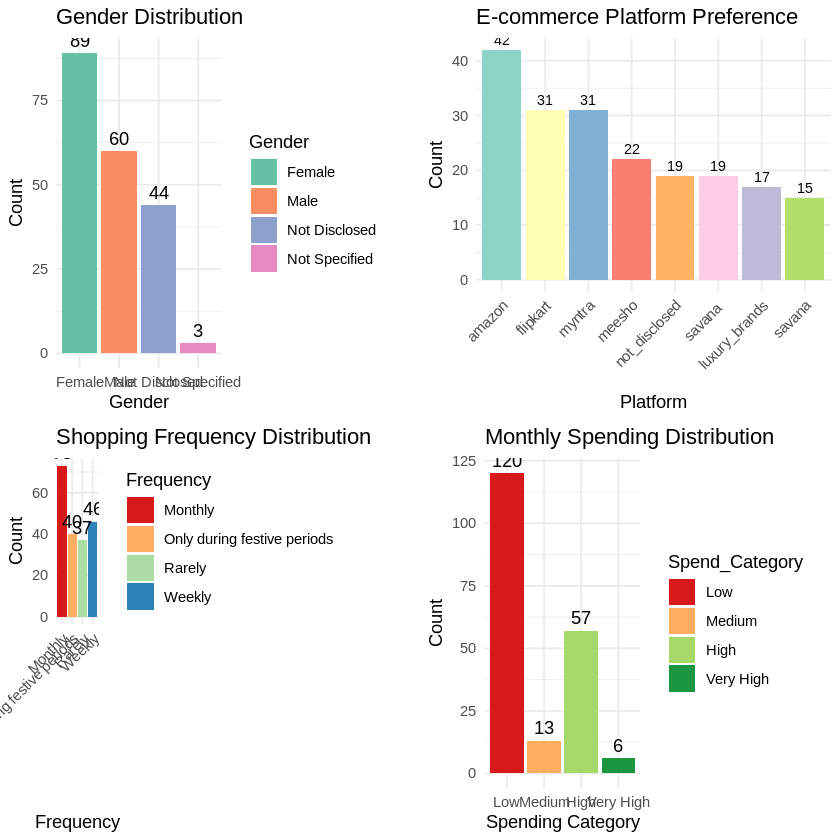


6.3: Payment Method Analysis


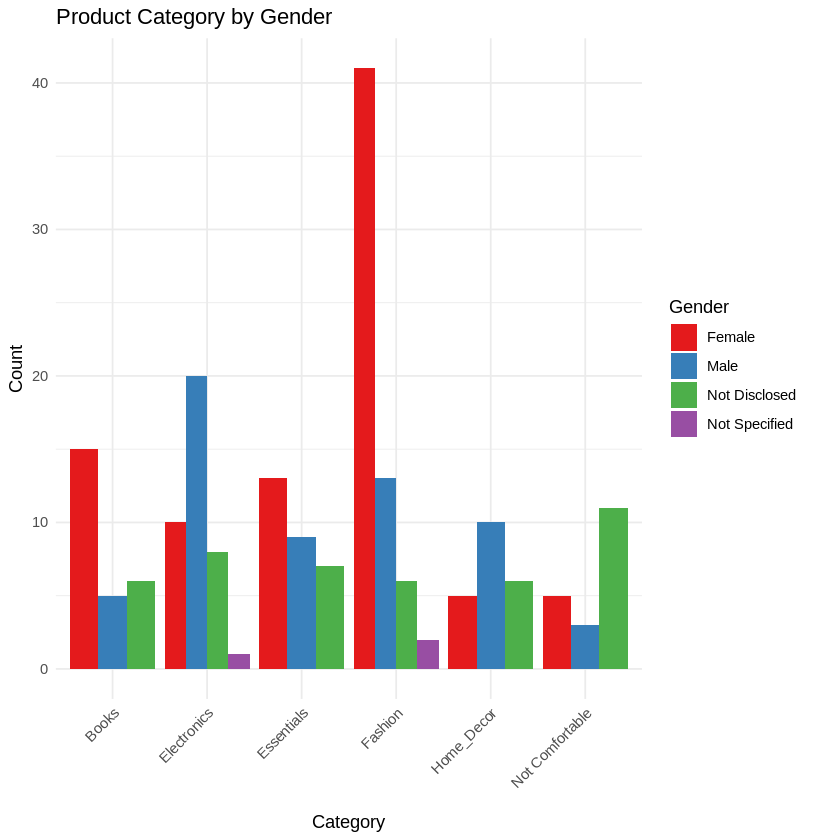


6.4: Peer Influence Analysis


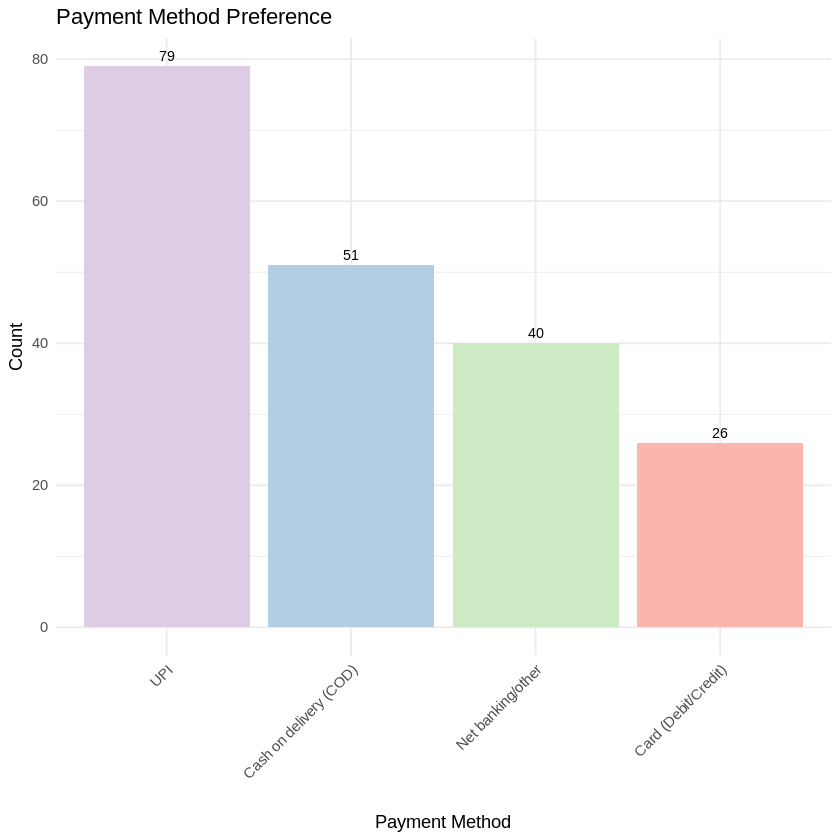


6.5: Discount Importance Analysis


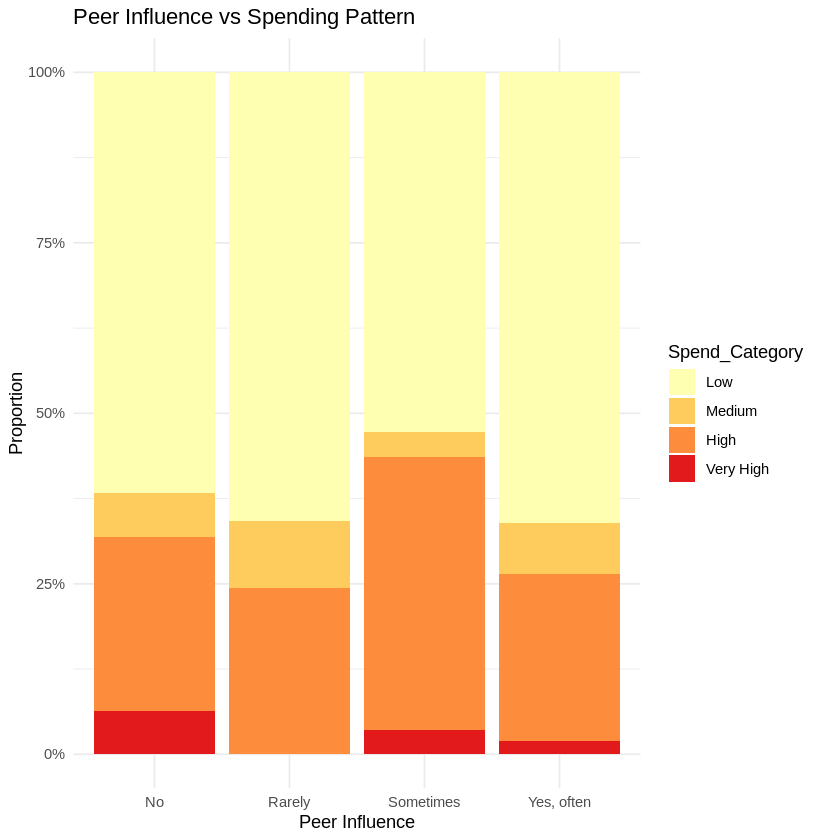


6.6: Returns and Exchange Analysis


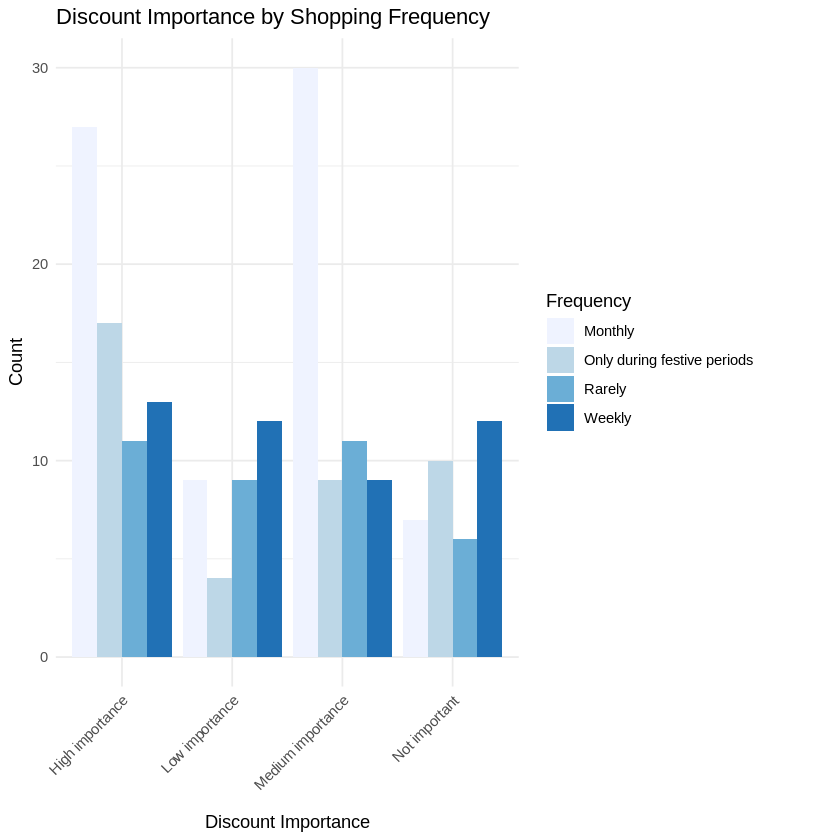


6.7: Bivariate Analysis


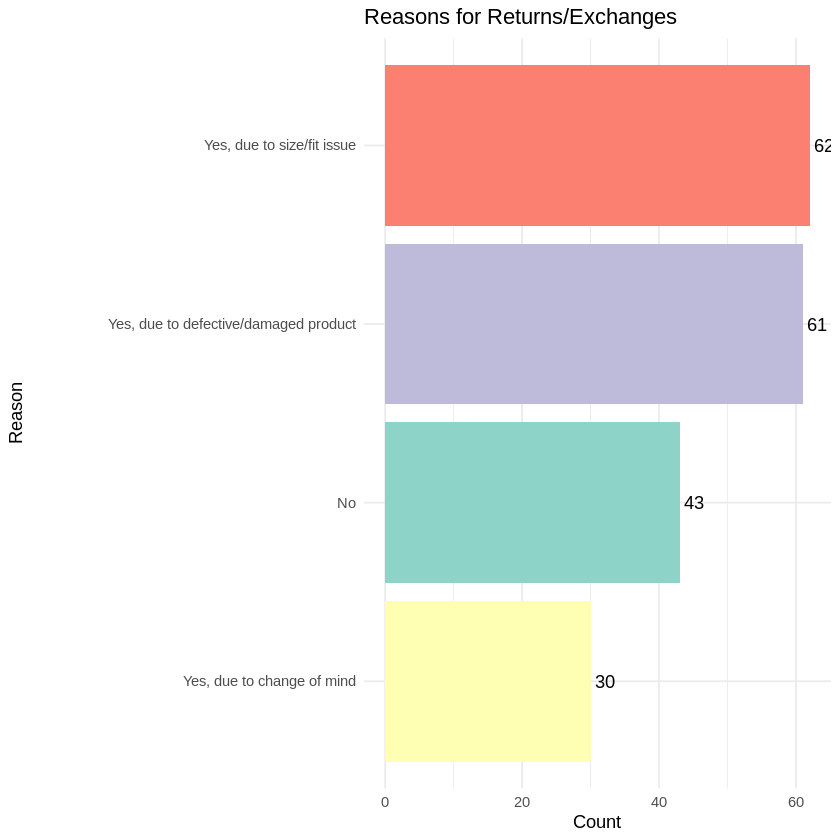

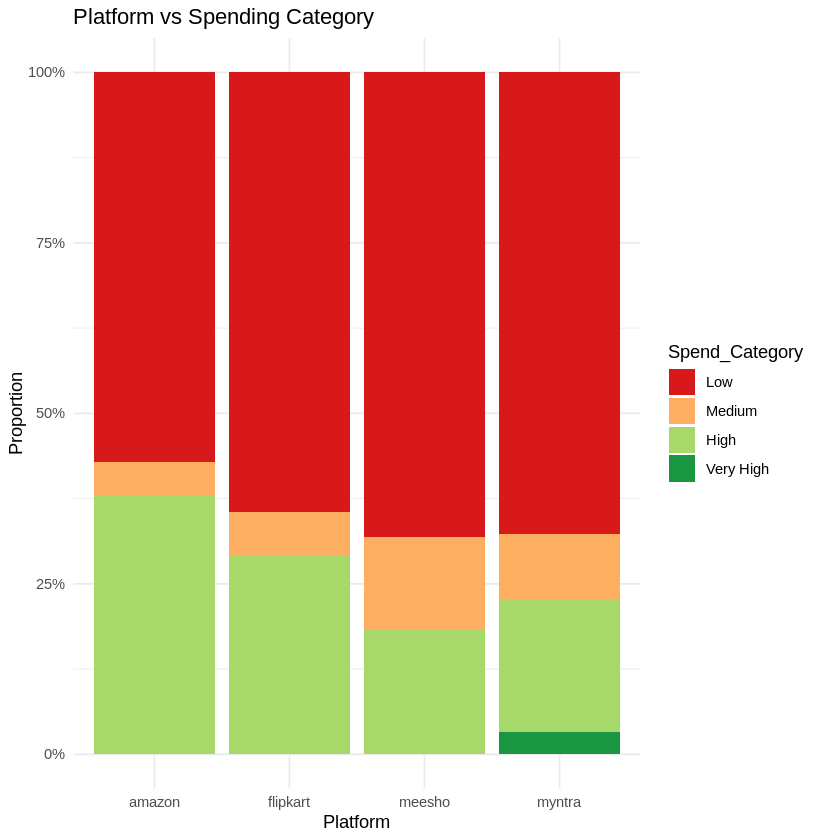

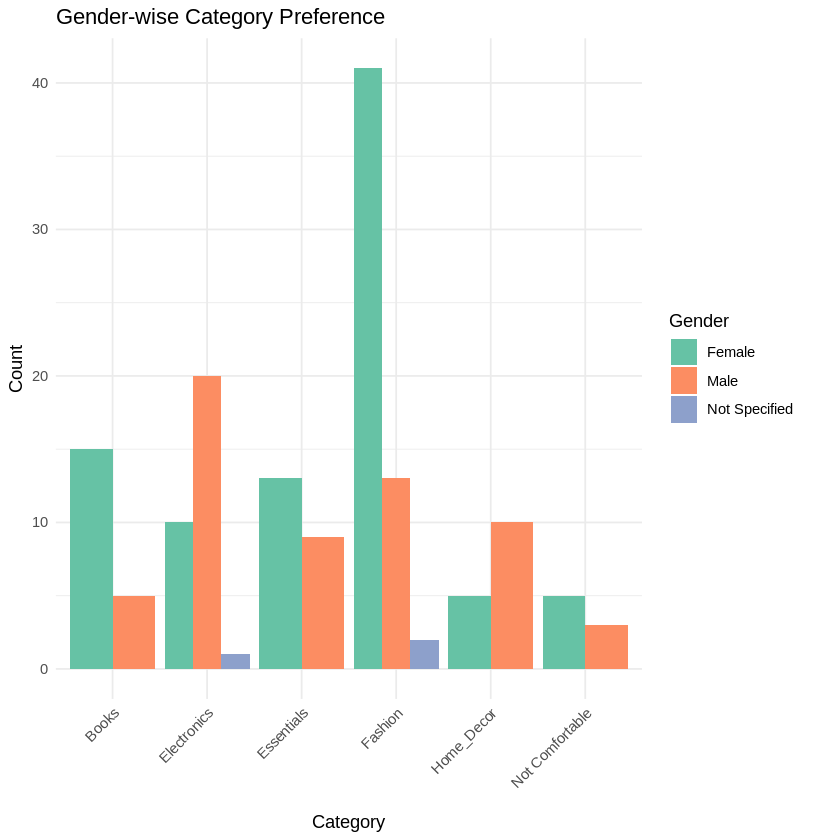

In [13]:
# ============================================================================
# STEP 6: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
cat("\n========== EXPLORATORY DATA ANALYSIS ==========\n")

# 6.1: Univariate Analysis
cat("\n6.1: Univariate Analysis\n")

# Gender Distribution
gender_plot <- ggplot(df_clean, aes(x = Gender, fill = Gender)) +
  geom_bar(stat = "count") +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5) +
  labs(title = "Gender Distribution", x = "Gender", y = "Count") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

# Platform Preference
platform_plot <- ggplot(df_clean, aes(x = reorder(Platform, Platform, function(x) -length(x)),
                                       fill = Platform)) +
  geom_bar() +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5, size = 3) +
  labs(title = "E-commerce Platform Preference", x = "Platform", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_brewer(palette = "Set3")

# Shopping Frequency
freq_plot <- ggplot(df_clean, aes(x = Frequency, fill = Frequency)) +
  geom_bar() +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5) +
  labs(title = "Shopping Frequency Distribution", x = "Frequency", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Spectral")

# Monthly Spending
spend_plot <- ggplot(df_clean, aes(x = Spend_Category, fill = Spend_Category)) +
  geom_bar() +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5) +
  labs(title = "Monthly Spending Distribution", x = "Spending Category", y = "Count") +
  theme_minimal() +
  scale_fill_brewer(palette = "RdYlGn")

# Arrange plots
grid.arrange(gender_plot, platform_plot, freq_plot, spend_plot, ncol = 2)

# 6.2: Product Category Analysis
cat("\n6.2: Product Category Analysis\n")

category_gender <- ggplot(df_clean, aes(x = Category, fill = Gender)) +
  geom_bar(position = "dodge") +
  labs(title = "Product Category by Gender", x = "Category", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set1")

print(category_gender)

# 6.3: Payment Method Analysis
cat("\n6.3: Payment Method Analysis\n")

payment_plot <- ggplot(df_clean, aes(x = reorder(Payment_Method, Payment_Method,
                                                  function(x) -length(x)),
                                      fill = Payment_Method)) +
  geom_bar() +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5, size = 3) +
  labs(title = "Payment Method Preference", x = "Payment Method", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_brewer(palette = "Pastel1")

print(payment_plot)

# 6.4: Peer Influence Analysis
cat("\n6.4: Peer Influence Analysis\n")

peer_influence_spend <- ggplot(df_clean, aes(x = Peer_Influence, fill = Spend_Category)) +
  geom_bar(position = "fill") +
  labs(title = "Peer Influence vs Spending Pattern",
       x = "Peer Influence", y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_brewer(palette = "YlOrRd")

print(peer_influence_spend)

# 6.5: Discount Importance Analysis
cat("\n6.5: Discount Importance Analysis\n")

discount_freq <- ggplot(df_clean, aes(x = Discount_Importance, fill = Frequency)) +
  geom_bar(position = "dodge") +
  labs(title = "Discount Importance by Shopping Frequency",
       x = "Discount Importance", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Blues")

print(discount_freq)

# 6.6: Returns and Exchange Analysis
cat("\n6.6: Returns and Exchange Analysis\n")

returns_table <- table(df_clean$Returns)
returns_df <- as.data.frame(returns_table)
colnames(returns_df) <- c("Return_Reason", "Count")

returns_plot <- ggplot(returns_df, aes(x = reorder(Return_Reason, Count), y = Count,
                                        fill = Return_Reason)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  geom_text(aes(label = Count), hjust = -0.2) +
  labs(title = "Reasons for Returns/Exchanges", x = "Reason", y = "Count") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_brewer(palette = "Set3")

print(returns_plot)

# 6.7: Bivariate Analysis
cat("\n6.7: Bivariate Analysis\n")

# Platform vs Spending
platform_spend <- ggplot(df_clean %>% filter(Platform %in% c("amazon", "flipkart",
                                                              "myntra", "meesho")),
                         aes(x = Platform, fill = Spend_Category)) +
  geom_bar(position = "fill") +
  labs(title = "Platform vs Spending Category", x = "Platform", y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_brewer(palette = "RdYlGn")

print(platform_spend)

# Gender vs Category
gender_category <- df_clean %>%
  filter(Gender != "Not Disclosed") %>%
  group_by(Gender, Category) %>%
  summarise(Count = n(), .groups = "drop") %>%
  ggplot(aes(x = Category, y = Count, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Gender-wise Category Preference", x = "Category", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")

print(gender_category)



========== ADVANCED VISUALIZATIONS ==========

7.1: Creating heatmap...

7.2: Time series analysis...


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


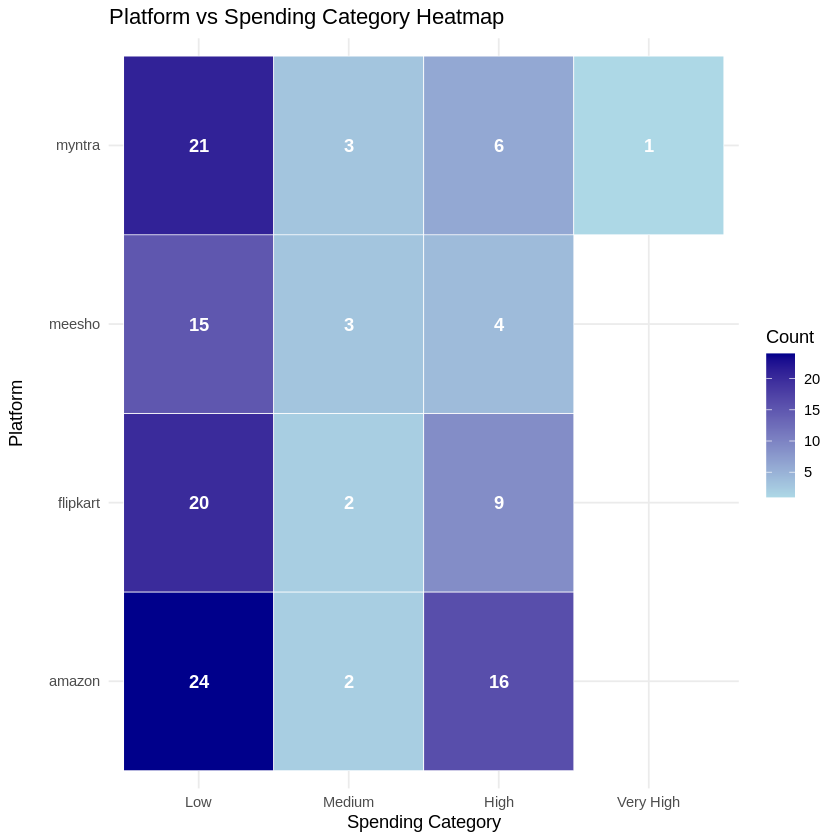

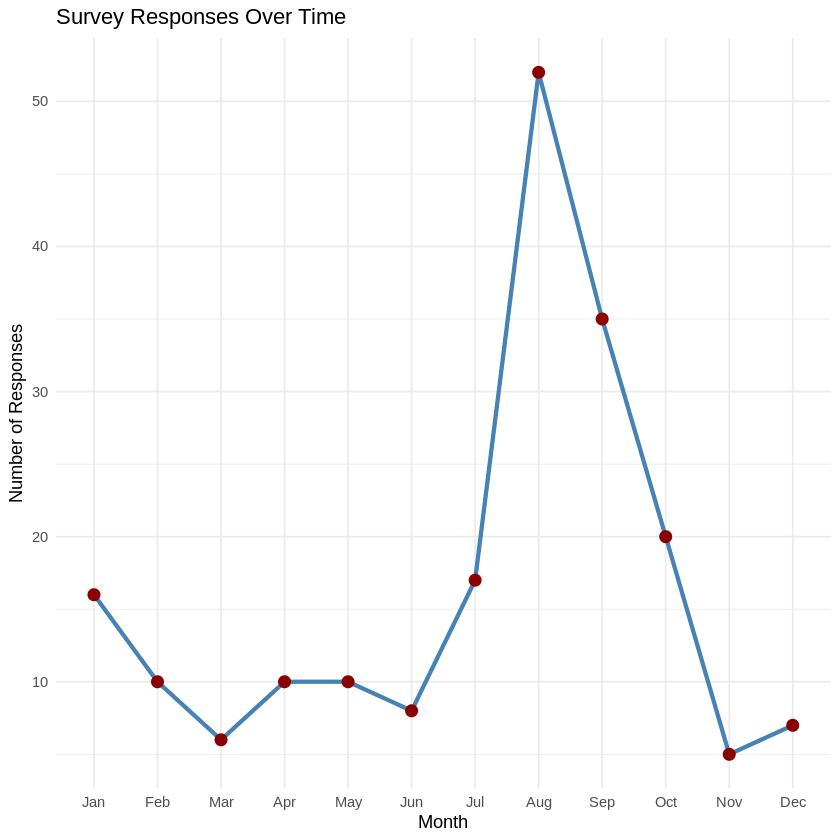

In [14]:
# ============================================================================
# STEP 7: ADVANCED VISUALIZATIONS
# ============================================================================
cat("\n========== ADVANCED VISUALIZATIONS ==========\n")

# 7.1: Heatmap of relationships
cat("\n7.1: Creating heatmap...\n")

# Create a contingency table
heatmap_data <- df_clean %>%
  filter(Platform %in% c("amazon", "flipkart", "myntra", "meesho")) %>%
  group_by(Platform, Spend_Category) %>%
  summarise(Count = n(), .groups = "drop") %>%
  pivot_wider(names_from = Spend_Category, values_from = Count, values_fill = 0)

heatmap_matrix <- as.matrix(heatmap_data[, -1])
rownames(heatmap_matrix) <- heatmap_data$Platform

heatmap_plot <- ggplot(df_clean %>%
                        filter(Platform %in% c("amazon", "flipkart", "myntra", "meesho")) %>%
                        group_by(Platform, Spend_Category) %>%
                        summarise(Count = n(), .groups = "drop"),
                      aes(x = Spend_Category, y = Platform, fill = Count)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Count), color = "white", fontface = "bold") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Platform vs Spending Category Heatmap",
       x = "Spending Category", y = "Platform") +
  theme_minimal()

print(heatmap_plot)

# 7.2: Time series analysis
cat("\n7.2: Time series analysis...\n")

# Responses over time
time_series <- df_clean %>%
  filter(!is.na(Month)) %>%
  group_by(Month) %>%
  summarise(Count = n(), .groups = "drop") %>%
  ggplot(aes(x = Month, y = Count, group = 1)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "darkred", size = 3) +
  labs(title = "Survey Responses Over Time", x = "Month", y = "Number of Responses") +
  theme_minimal()

print(time_series)


In [15]:
# ============================================================================
# STEP 8: STATISTICAL ANALYSIS
# ============================================================================
cat("\n========== STATISTICAL ANALYSIS ==========\n")

# 8.1: Chi-square test for independence
cat("\n8.1: Chi-square test - Gender vs Spending\n")
chi_test1 <- chisq.test(table(df_clean$Gender, df_clean$Spend_Category))
print(chi_test1)

cat("\n8.2: Chi-square test - Platform vs Frequency\n")
chi_test2 <- chisq.test(table(df_clean$Platform, df_clean$Frequency))
print(chi_test2)

# 8.3: Summary statistics by groups
cat("\n8.3: Spending patterns by Gender:\n")
spend_by_gender <- df_clean %>%
  group_by(Gender, Spend_Category) %>%
  summarise(Count = n(), .groups = "drop") %>%
  pivot_wider(names_from = Spend_Category, values_from = Count, values_fill = 0)
print(spend_by_gender)



========== STATISTICAL ANALYSIS ==========

8.1: Chi-square test - Gender vs Spending


Warning message in chisq.test(table(df_clean$Gender, df_clean$Spend_Category)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(df_clean$Gender, df_clean$Spend_Category)
X-squared = NaN, df = 12, p-value = NA


8.2: Chi-square test - Platform vs Frequency


Warning message in chisq.test(table(df_clean$Platform, df_clean$Frequency)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(df_clean$Platform, df_clean$Frequency)
X-squared = 22.557, df = 21, p-value = 0.3681


8.3: Spending patterns by Gender:
# A tibble: 4 × 5
  Gender          Low Medium  High `Very High`
  <chr>         <int>  <int> <int>       <int>
1 Female           52      6    28           3
2 Male             40      3    16           1
3 Not Disclosed    25      4    13           2
4 Not Specified     3      0     0           0



========== ASSOCIATION RULE MINING ==========

9.1: Preparing data for association rule mining...
Transaction data prepared. Number of transactions: 126 

9.2: Mining association rules...
Number of rules generated: 300 

9.3: Top 10 Association Rules by Lift:
     lhs                                           rhs                                          support confidence   coverage     lift count
[1]  {Category=Home_Decor}                      => {Priority=Cost- focused}                  0.07142857  0.7500000 0.09523810 3.500000     9
[2]  {Priority=Balanced (both brand and cost),                                                                                              
      Frequency=Only during festive periods,                                                                                                
      Discount_Importance=High importance}      => {Platform=amazon}                         0.05555556  1.0000000 0.05555556 3.000000     7
[3]  {Priority=Balanced (both bran

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.

Warning message:
“Unknown control parameters: main”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE

9.5: Finding specific patterns...
Rules predicting High Spending:
No strong rules found for high spending.

Rules predicting Platform choice:
    lhs                                           rhs                  support confidence   coverage  lift count
[1] {Priority=Balanced (both brand and cost),                                                                   
     Frequency=Only during festive periods,                                                                     
     Discount_Importance=High importance}      => {Platform=amazon} 0.05555556      1.000 0.05555556 3.000     7
[2] {Priority=Balanced (both brand and cost),                                                                   
     Peer_Influence=

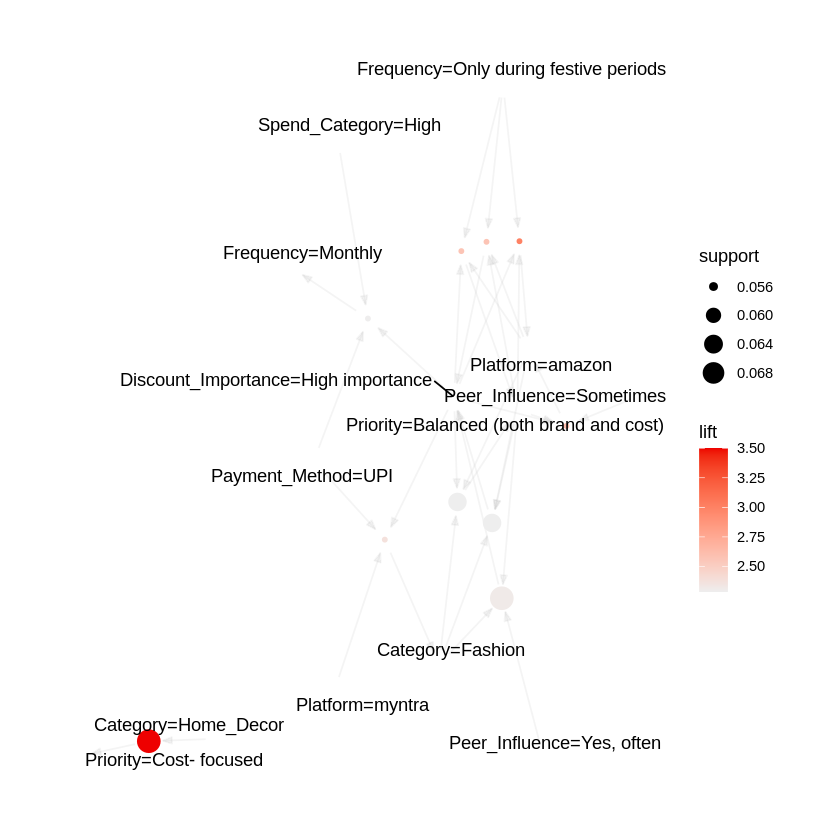

In [17]:

# ============================================================================
# STEP 9: ASSOCIATION RULE MINING
# ============================================================================
cat("\n========== ASSOCIATION RULE MINING ==========\n")

# 9.1: Prepare data for association rules
cat("\n9.1: Preparing data for association rule mining...\n")

# Select relevant columns and create transactions
transactions_df <- df_clean %>%
  select(Platform, Category, Priority, Frequency, Peer_Influence,
         Discount_Importance, Payment_Method, Spend_Category) %>%
  filter(Platform %in% c("amazon", "flipkart", "myntra", "meesho"))

# Convert all columns to factor format required by arules
transactions_df[] <- lapply(transactions_df, as.factor)

# Convert to transactions object directly from the data frame
library(arules)
trans <- as(transactions_df, "transactions")

cat("Transaction data prepared. Number of transactions:", length(trans), "\n")

# 9.2: Mine association rules
cat("\n9.2: Mining association rules...\n")

# Generate rules with minimum support and confidence
rules <- apriori(trans,
                 parameter = list(supp = 0.05, conf = 0.6, minlen = 2, maxlen = 5),
                 control = list(verbose = FALSE))

cat("Number of rules generated:", length(rules), "\n")

# 9.3: Inspect top rules
cat("\n9.3: Top 10 Association Rules by Lift:\n")
rules_sorted <- sort(rules, by = "lift", decreasing = TRUE)
top_rules <- head(rules_sorted, 10)
inspect(top_rules)

# 9.4: Visualize association rules
cat("\n9.4: Visualizing association rules...\n")

if (length(rules) > 0) {
  # Scatter plot
  plot(rules_sorted, method = "scatterplot", measure = c("support", "confidence"),
       shading = "lift", main = "Association Rules - Scatter Plot")

  # Graph visualization
  if (length(rules_sorted) >= 10) {
    plot(head(rules_sorted, 10), method = "graph",
         main = "Top 10 Association Rules - Network")
  }
}

# 9.5: Find specific patterns
cat("\n9.5: Finding specific patterns...\n")

# Rules with high spending
high_spend_rules <- subset(rules, subset = rhs %in% "Spend_Category=High" |
                            rhs %in% "Spend_Category=Very High")
cat("Rules predicting High Spending:\n")
if (length(high_spend_rules) > 0) {
  inspect(head(sort(high_spend_rules, by = "confidence"), 5))
} else {
  cat("No strong rules found for high spending.\n")
}

# Rules for platform preference
platform_rules <- subset(rules, subset = rhs %pin% "Platform=")
cat("\nRules predicting Platform choice:\n")
if (length(platform_rules) > 0) {
  inspect(head(sort(platform_rules, by = "lift"), 5))
} else {
  cat("No strong rules found for platform preference.\n")
}


========== PREDICTIVE MODELING ==========

10.1: Preparing data for modeling...
Model data prepared. Dimensions: 126 x 10 

10.2: Splitting data into train and test sets...
Training set: 89 samples
Testing set: 37 samples

10.3: Training Random Forest model...

Call:
 randomForest(formula = High_Spender ~ ., data = train_data, ntree = 500,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 41.57%
Confusion matrix:
   0  1 class.error
0 50 13   0.2063492
1 24  2   0.9230769

10.4: Making predictions on test set...

10.5: Model Evaluation:
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 25  8
         1  2  2
                                          
               Accuracy : 0.7297          
                 95% CI : (0.5588, 0.8621)
    No Information Rate : 0.7297          
    P-Value [Acc > NIR] : 0.5841

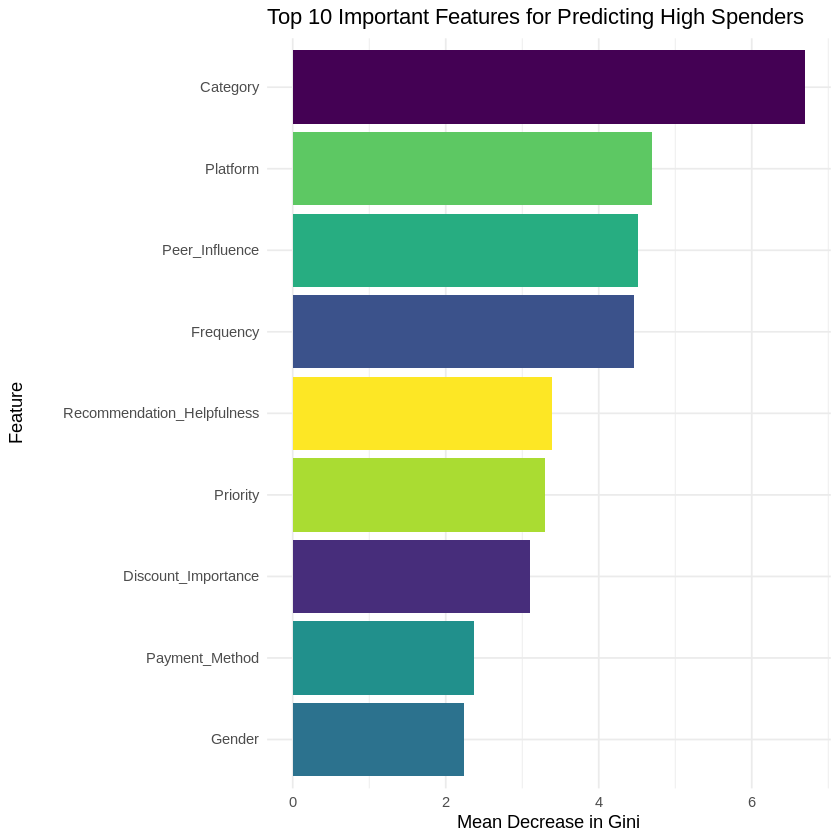

In [18]:
# ============================================================================
# STEP 10: PREDICTIVE MODELING
# ============================================================================
cat("\n========== PREDICTIVE MODELING ==========\n")

# 10.1: Prepare data for modeling
cat("\n10.1: Preparing data for modeling...\n")

# Select features for modeling
model_data <- df_clean %>%
  filter(Platform %in% c("amazon", "flipkart", "myntra", "meesho")) %>%
  select(Gender, Platform, Category, Priority, Frequency, Peer_Influence,
         Discount_Importance, Payment_Method, Recommendation_Helpfulness,
         High_Spender) %>%
  na.omit()

# Convert target to factor
model_data$High_Spender <- as.factor(model_data$High_Spender)

# Convert all character columns to factors
model_data[] <- lapply(model_data, function(x) if(is.character(x)) as.factor(x) else x)

cat("Model data prepared. Dimensions:", nrow(model_data), "x", ncol(model_data), "\n")

# 10.2: Split data into training and testing sets
cat("\n10.2: Splitting data into train and test sets...\n")
set.seed(123)
trainIndex <- createDataPartition(model_data$High_Spender, p = 0.7, list = FALSE)
train_data <- model_data[trainIndex, ]
test_data <- model_data[-trainIndex, ]

cat("Training set:", nrow(train_data), "samples\n")
cat("Testing set:", nrow(test_data), "samples\n")

# 10.3: Train Random Forest Model
cat("\n10.3: Training Random Forest model...\n")

rf_model <- randomForest(High_Spender ~ .,
                         data = train_data,
                         ntree = 500,
                         importance = TRUE)

print(rf_model)

# 10.4: Make predictions
cat("\n10.4: Making predictions on test set...\n")
rf_predictions <- predict(rf_model, test_data)

# 10.5: Evaluate model
cat("\n10.5: Model Evaluation:\n")
conf_matrix <- confusionMatrix(rf_predictions, test_data$High_Spender)
print(conf_matrix)

# 10.6: Feature importance
cat("\n10.6: Feature Importance:\n")
importance_df <- as.data.frame(importance(rf_model))
importance_df$Feature <- rownames(importance_df)
importance_df <- importance_df[order(-importance_df$MeanDecreaseGini), ]

print(importance_df[, c("Feature", "MeanDecreaseGini")])

# Plot feature importance
feature_imp_plot <- ggplot(head(importance_df, 10),
                           aes(x = reorder(Feature, MeanDecreaseGini),
                               y = MeanDecreaseGini, fill = Feature)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Important Features for Predicting High Spenders",
       x = "Feature", y = "Mean Decrease in Gini") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_viridis_d()

print(feature_imp_plot)



In [19]:
# ============================================================================
# STEP 11: KEY INSIGHTS AND SUMMARY
# ============================================================================
cat("\n========== KEY INSIGHTS AND SUMMARY ==========\n")

cat("\n1. DEMOGRAPHIC INSIGHTS:\n")
cat("   - Total responses analyzed:", nrow(df_clean), "\n")
gender_dist <- table(df_clean$Gender)
cat("   - Gender distribution:", paste(names(gender_dist), "=", gender_dist, collapse = ", "), "\n")

cat("\n2. PLATFORM INSIGHTS:\n")
top_platforms <- head(sort(table(df_clean$Platform), decreasing = TRUE), 3)
cat("   - Top 3 platforms:", paste(names(top_platforms), "(", top_platforms, ")", collapse = ", "), "\n")

cat("\n3. SPENDING INSIGHTS:\n")
spend_dist <- table(df_clean$Spend_Category)
cat("   - Spending distribution:", paste(names(spend_dist), "=", spend_dist, collapse = ", "), "\n")

cat("\n4. SHOPPING BEHAVIOR:\n")
freq_dist <- table(df_clean$Frequency)
cat("   - Shopping frequency:", paste(names(freq_dist), "=", freq_dist, collapse = ", "), "\n")

cat("\n5. PAYMENT PREFERENCES:\n")
payment_dist <- head(sort(table(df_clean$Payment_Method), decreasing = TRUE), 3)
cat("   - Top payment methods:", paste(names(payment_dist), "(", payment_dist, ")", collapse = ", "), "\n")

cat("\n6. MODEL PERFORMANCE:\n")
cat("   - Random Forest Accuracy:", round(conf_matrix$overall['Accuracy'] * 100, 2), "%\n")
cat("   - Most important features:", paste(head(importance_df$Feature, 3), collapse = ", "), "\n")

cat("\n7. ASSOCIATION RULES:\n")
cat("   - Total rules discovered:", length(rules), "\n")
if (length(rules) > 0) {
  cat("   - Strongest rule lift:", round(max(quality(rules)$lift), 2), "\n")
}



========== KEY INSIGHTS AND SUMMARY ==========

1. DEMOGRAPHIC INSIGHTS:
   - Total responses analyzed: 196 
   - Gender distribution: Female = 89, Male = 60, Not Disclosed = 44, Not Specified = 3 

2. PLATFORM INSIGHTS:
   - Top 3 platforms: amazon ( 42 ), flipkart ( 31 ), myntra ( 31 ) 

3. SPENDING INSIGHTS:
   - Spending distribution: Low = 120, Medium = 13, High = 57, Very High = 6, Unknown = 0 

4. SHOPPING BEHAVIOR:
   - Shopping frequency: Monthly = 73, Only during festive periods = 40, Rarely = 37, Weekly = 46 

5. PAYMENT PREFERENCES:
   - Top payment methods: UPI ( 79 ), Cash on delivery (COD) ( 51 ), Net banking/other ( 40 ) 

6. MODEL PERFORMANCE:
   - Random Forest Accuracy: 72.97 %
   - Most important features: Category, Platform, Peer_Influence 

7. ASSOCIATION RULES:
   - Total rules discovered: 300 
   - Strongest rule lift: 3.5 


In [20]:
# ============================================================================
# STEP 12: SAVE RESULTS AND VISUALIZATIONS
# ============================================================================
cat("\n========== SAVING RESULTS ==========\n")

# Save association rules
write(rules, file = "association_rules.csv", sep = ",", col.names = NA)
cat("Association rules saved to 'association_rules.csv'\n")

# Save model
saveRDS(rf_model, "random_forest_model.rds")
cat("Random Forest model saved to 'random_forest_model.rds'\n")

# Save feature importance
write.csv(importance_df, "feature_importance.csv", row.names = FALSE)
cat("Feature importance saved to 'feature_importance.csv'\n")

# Save summary statistics
summary_stats <- df_clean %>%
  group_by(Gender, Platform, Spend_Category) %>%
  summarise(Count = n(), .groups = "drop")
write.csv(summary_stats, "summary_statistics.csv", row.names = FALSE)
cat("Summary statistics saved to 'summary_statistics.csv'\n")

cat("\n========== PROJECT COMPLETED SUCCESSFULLY! ==========\n")
cat("All files have been generated and saved.\n")
cat("Check your working directory for output files.\n")


========== SAVING RESULTS ==========
Association rules saved to 'association_rules.csv'
Random Forest model saved to 'random_forest_model.rds'
Feature importance saved to 'feature_importance.csv'
Summary statistics saved to 'summary_statistics.csv'

========== PROJECT COMPLETED SUCCESSFULLY! ==========
All files have been generated and saved.
Check your working directory for output files.
